# Graded Challenge 1


## Perkenalan 

Name        : Aan Nurliyanah 

Batch       : 002 


## Assignment Objectives
Graded Challenge 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:

-  Mampu memahami konsep regression dengan Linear Regression.
-  Mampu mempersiapkan data untuk digunakan dalam model Linear Regression.
-  Mampu mengimplementasikan Linear Regression untuk membuat prediksi.

## Problems
Buatlah model Regression menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing dengan dataset yang disediakan.

## Import Libraries

Library yang digunakan:
- pandas, numpy, seaborn dan matplotlib untuk analisis dan perhitungan data dan visualisasi 
- train_test_split untuk memisahkan antara data train dan test 
- winsorizer untuk melakukan handling outlier 
- standarscaler untuk distribusi normal 
- ordinalencoder untuk encode 
- linearregression untuk modeling regresi 
- mean_absolute_error untuk melakukan evaluasi model 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import warnings


from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings(action='ignore')

## Data Loading and Overview

Dataset diambil dari https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

Memanggil data dengan menggunakan pd.read_csv 

In [2]:
data = pd.read_csv('rideshare_kaggle.csv', na_values=['?',' ','99999','N/A'])


Untuk menampilkan semua columns mengunakan fungsi pd.set_option

In [3]:
pd.set_option("display.max_columns", 999)

In [4]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


menampilkan info dari data, jenis tipe data dan menghitung nilai di dalam kolom 


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Mengecek apakah ada data duplicate 

In [6]:
duplicates = data.duplicated().sum() 
if  duplicates == 0:
    print("There are no duplicted rows in this data")
else:
    print('There are: ', str(duplicates), " duplicates")

There are no duplicted rows in this data


Hasil : Tidak terdapat data duplikat 

In [7]:
data[data.duplicated()].shape

(0, 57)

Melakukan pengecekan missing value 

In [8]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Menghitung nilai presentase dari banyaknya missing value

In [9]:
data.isnull().mean()*100

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.949402
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


Dari hasil diatas, didapatkan nilai missing value sebesar 7,949402 % , untuk selanjutnya akan di drop di bagian data cleaning

Membagi data kedalam numeric dan kategori 

In [10]:
num_col = data.describe().columns.tolist()
cat_col = data.select_dtypes(include=['object']).columns.tolist()

Mengecek central tendency dari data numerik 

In [11]:
data[num_col].describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

Melihat value dari kolom kategori menggunakan fungsi for loop

In [12]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(data[i].value_counts())
    print('-' * 10)

id

424553bb-7174-41ea-aeb4-fe06d4f4b9d7    1
86557077-556d-4cc0-8acf-4d618d5c0a8d    1
fa75d4b4-52c8-4e65-a5e6-335c8268c968    1
2d051bf0-4e5e-4b18-a931-ea15c4fb9066    1
7339fbe3-b0bb-4bac-a037-b1dc2ab0feac    1
                                       ..
0281be2d-1573-47a5-868d-fef6100d1b77    1
33827bd1-5164-4579-b567-14e85220c99b    1
6c736bfe-40d0-47b9-be59-ef41d9df516b    1
7311da4b-0932-4572-97ee-242a9e5f0229    1
e7fdc087-fe86-40a5-a3c3-3b2a8badcbda    1
Name: id, Length: 693071, dtype: int64
----------
datetime

2018-11-26 23:21:14    156
2018-11-29 01:02:08    156
2018-11-26 23:33:14    156
2018-11-28 15:56:08    156
2018-11-28 14:29:08    156
                      ... 
2018-12-01 14:18:01      6
2018-12-16 12:55:06      4
2018-11-28 09:32:17      3
2018-12-13 15:10:13      1
2018-11-30 13:17:58      1
Name: datetime, Length: 31350, dtype: int64
----------
timezone

America/New_York    693071
Name: timezone, dtype: int64
----------
source

Financial District         58857
Thea

Melihat sekilas data di dalam kolom name di group by dengan jumlah price

In [13]:
d = data.groupby('name')['price'].sum()
d

name
Black           1130758.00
Black SUV       1668679.50
Lux              910509.50
Lux Black       1181605.55
Lux Black XL    1656124.55
Lyft             492413.68
Lyft XL          784375.20
Shared           308929.50
Taxi                  0.00
UberPool         482184.00
UberX            537997.00
UberXL           863803.00
WAV              538013.50
Name: price, dtype: float64

Didalam kategori Taxi tidak terdapat data sama sekali

Melihat sekilas data di dalam kolom name di group by dengan jumlah data price

In [14]:
e = data.groupby('name')['price'].count()
e

name
Black           55095
Black SUV       55096
Lux             51235
Lux Black       51235
Lux Black XL    51235
Lyft            51235
Lyft XL         51235
Shared          51233
Taxi                0
UberPool        55091
UberX           55094
UberXL          55096
WAV             55096
Name: price, dtype: int64

Pada kolom taxi tidak terdapat data sama sekali, dapat diasumsikan hilangnya data / missing value harga ada di kategori taxi 

Melihat cab type dan price

In [15]:
f = data.groupby('cab_type')['price'].count()
f

cab_type
Lyft    307408
Uber    330568
Name: price, dtype: int64

Terdapat kolom yang tampak simillar, yaitu visibility dan visibility.1

In [16]:
data[['visibility','visibility.1']]

,visibility,visibility.1
0,10.000,10.000
1,4.786,4.786
2,10.000,10.000
3,10.000,10.000
4,10.000,10.000
...,...,...
693066,9.785,9.785
693067,9.785,9.785
693068,9.785,9.785
693069,9.785,9.785


dari analisis antara visibility dan visibility.1 didapatkan bahwa kedua kolom ini sama persis, maka kolom visibility.1 akan kita drop.

Based on general overview:

- terdapat missing value sebanyak 55095 data di kolom price 
- jika di presentasekan jumlah missing value sebesar 7,949402 %
- didapatkan data bahwa missing value pada price terdapat di kategori taxi pada kolom name, missing value akan di drop 
- tidak terdapat duplikat data 
- dari analisis antara kolom visibility dan visibility.1 didapatkan bahwa kedua kolom ini sama persis, maka kolom visibility.1 akan kita drop.
- personal adjustment : untuk kolom dengan nama belakang time akan di drop, karena isi datanya tidak menerangkan time diantaranya:
'apparentTemperatureHighTime','apparentTemperatureLowTime',,'uvIndexTime',
'temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime',
'apparentTemperatureMaxTime','sunriseTime','sunsetTime'
- id','timestamp' hanya bersifat unique value jadi akan di drop 
- datetime akan di drop karena sudah diwakilkan dengan adanya hours,day, month
- timezone akan di drop karena unique value nya hanya 1 dan tidak merepresentasi 
- 'uvIndex','ozone','moonPhase','precipIntensityMax',,'latitude','longitude',
'long_summary','precipIntensity','precipProbability , kolom kolom ini juga tidak terlalu berpengaruh jadi akan di drop 
- 'product_id' sudah diwakilkan dengan adanya cab_type dan name



## Data Cleaning

In [17]:
# dataframe di simpan dengan nama data_clean
data_clean = data.copy()
data_clean.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Menghapus missing value dengan dropna per baris.

In [18]:
data_clean.dropna(axis=0, inplace=True)

Menghapus kolom kolom yang tidak digunakan 

In [19]:
data_clean.drop(['id','timestamp','datetime','timezone','product_id','latitude','longitude','visibility.1',
'long_summary','precipIntensity','precipProbability','windGustTime','temperatureHighTime','temperatureLowTime',
'apparentTemperatureHighTime','apparentTemperatureLowTime','uvIndex','ozone','moonPhase','precipIntensityMax','uvIndexTime',
'temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime',
'apparentTemperatureMaxTime','sunriseTime','sunsetTime'], axis=1,inplace= True)

Mengecek hasil penghapusan kolom

In [20]:
data_clean.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,37.12,Mostly Cloudy,0.68,8.66,9.17,10.000,43.68,34.19,37.95,27.39,partly-cloudy-night,32.70,1021.98,57,0.72,39.89,43.68,33.73,38.07
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,37.35,Rain,0.94,11.98,11.98,4.786,47.30,42.10,43.92,36.20,rain,41.83,1003.97,90,1.00,40.49,47.30,36.20,43.92
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Clear,0.75,7.33,7.33,10.000,47.55,33.10,44.12,29.11,clear-night,31.10,992.28,240,0.03,35.36,47.55,31.04,44.12
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Clear,0.73,5.28,5.28,10.000,45.03,28.90,38.53,26.20,clear-night,26.64,1013.73,310,0.00,34.67,45.03,30.30,38.53
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,30.88,Partly Cloudy,0.70,9.14,9.14,10.000,42.18,36.71,35.75,30.29,partly-cloudy-night,28.61,998.36,303,0.44,33.10,42.18,29.11,35.75


Mengecek ukuran data sebelum dan sesudah dihapus kolom dan missing value.

In [21]:
data.shape

(693071, 57)

In [22]:
data_clean.shape

(637976, 30)

Tersisa 637976 baris dan 30 kolom di data_clean

Melihat kembali data duplicated dan mendrop data duplicated

In [23]:
data_clean[data_clean.duplicated()].shape

(55910, 30)

Setelah dilakukan pengecekan duplikat terdapat 55910 data duplikat, setelah kolom yang tidak digunakan dihapus, terjadi banyak duplikasi data, selanjutnya akan di drop 

In [24]:
data_clean.drop_duplicates(inplace=True)
data_clean[data_clean.duplicated()].shape

(0, 30)

In [25]:
data_clean.shape

(582066, 30)

Data clean siap digunakan dengan total 582066 baris dan 30 kolom.

## EDA for Analysis Purpose

Melihat korelasi antar kolom secara keseluruhan, didapatkan hanya distance dan surge_multiplier saja yang mempunyai hubungan dengan price. 

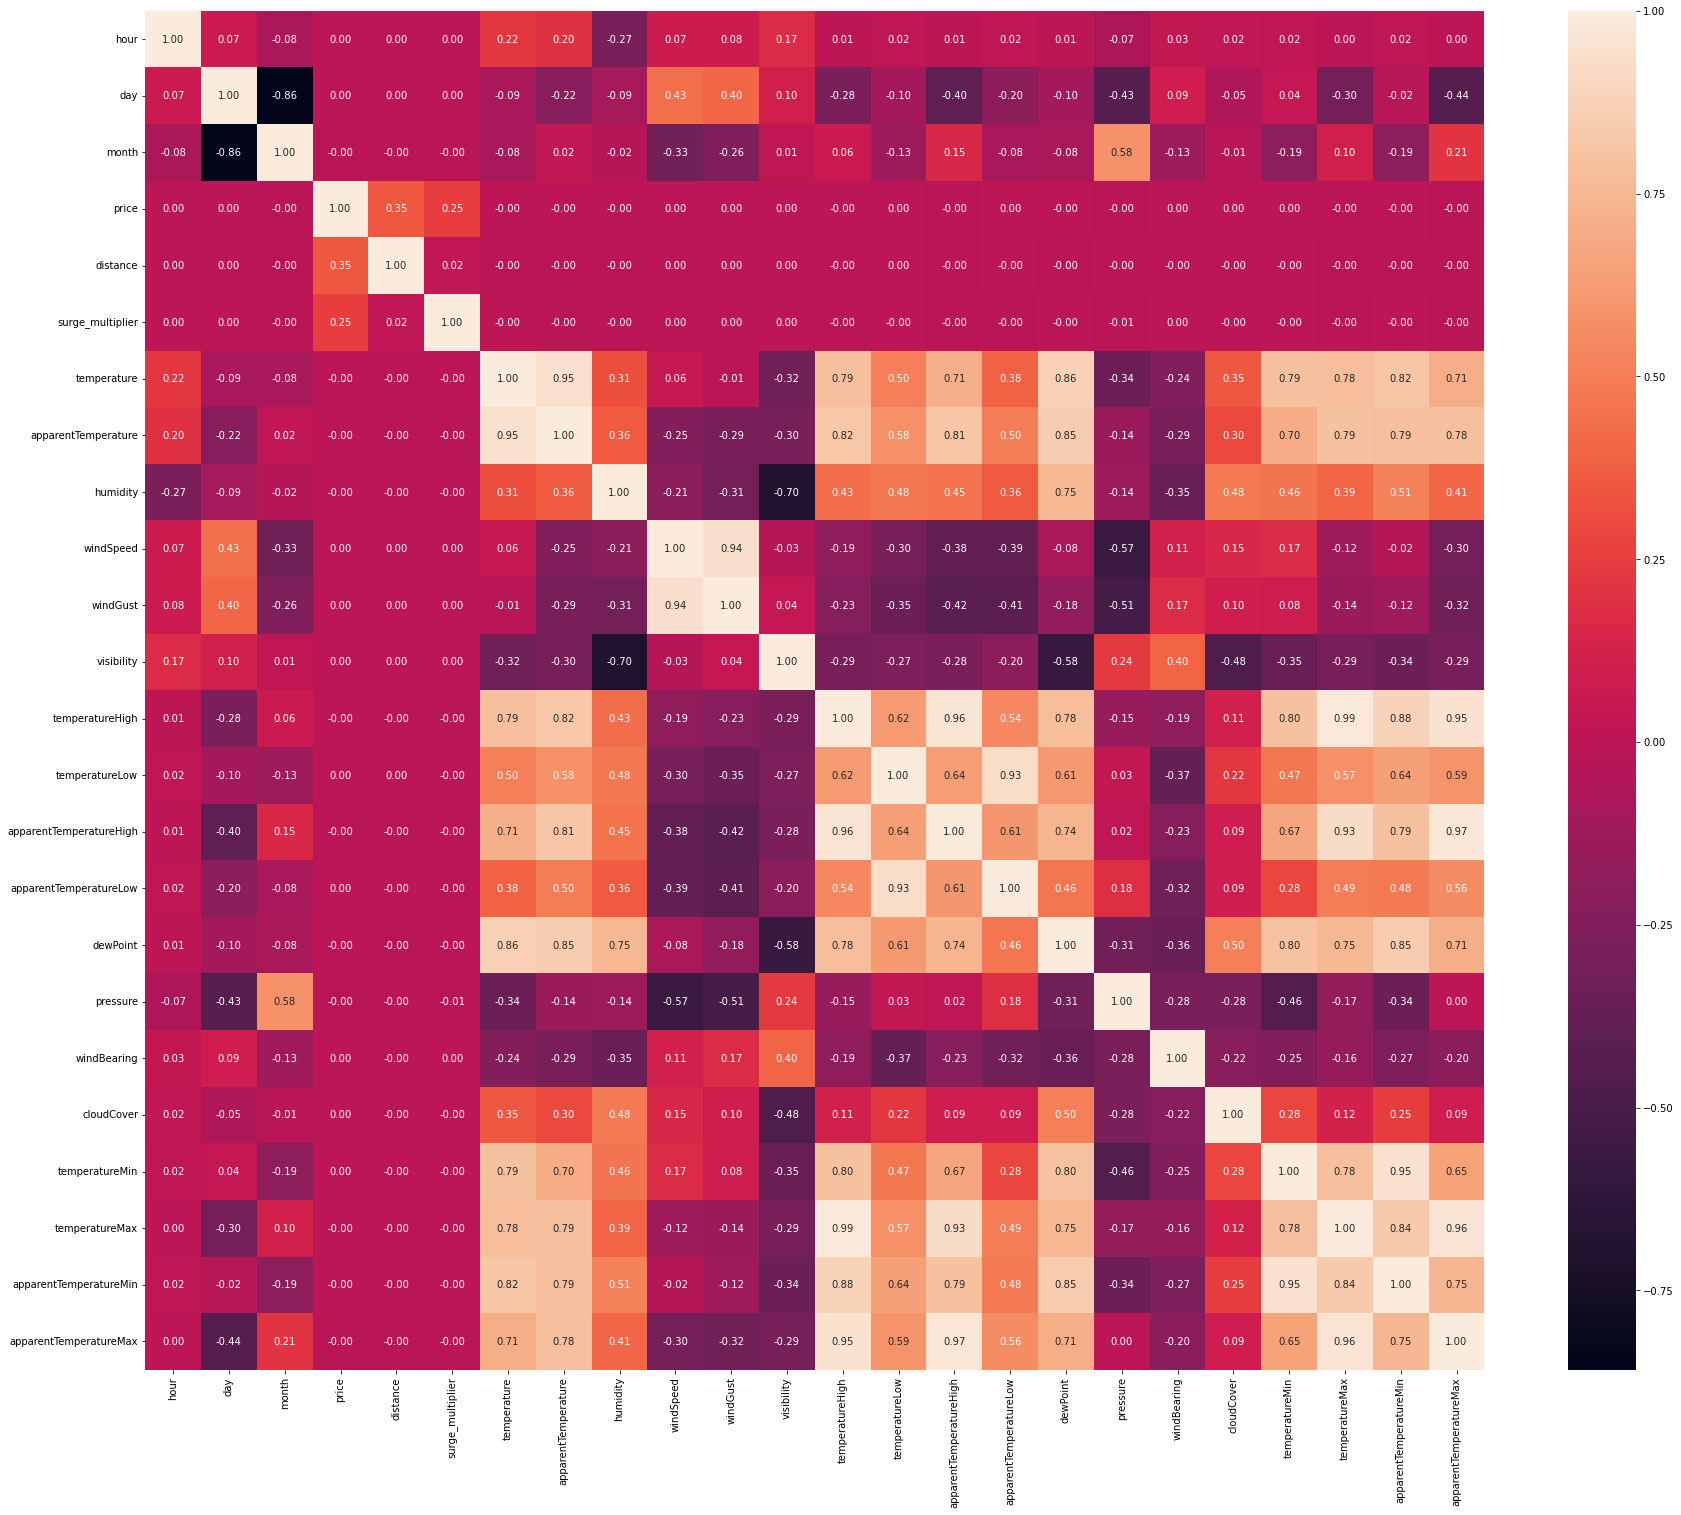

In [26]:
plt.figure(figsize=(30,25))
sns.heatmap(data_clean.corr(), annot=True, fmt='.2f')
plt.show()

Melihat visualisasi hubungan antara kolom distance dengan rata rata price

<AxesSubplot:xlabel='distance'>

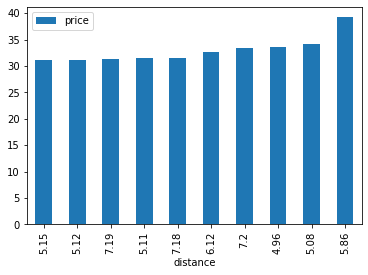

In [27]:
data_clean.groupby('distance')[['price']].mean().sort_values('price').tail(10).plot(kind='bar')

Dari visualiasasi diatas, semakin besar nilai distance rata rata harga semakin naik 

Melihat visualisasi hubungan antara kolom surge_multiplier dengan rata rata price

<AxesSubplot:xlabel='surge_multiplier'>

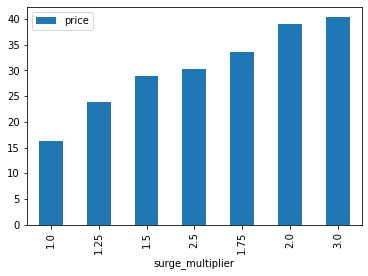

In [28]:
data_clean.groupby('surge_multiplier')[['price']].mean().sort_values('price').plot(kind='bar')

dari data visualisasi diatas didapatkan semakin tinggi surge_multiplier, price semakin besar

Melihat visualisasi antara temperature dan rata rata price

<AxesSubplot:xlabel='temperature'>

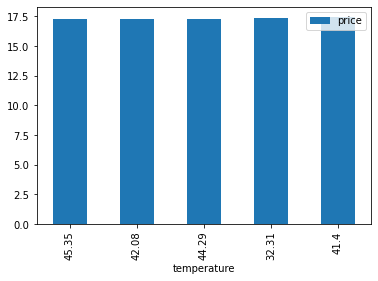

In [29]:
data_clean.groupby('temperature')[['price']].mean().sort_values('price').tail().plot(kind='bar')

dari data visualisasi diatas didapatkan untuk temperatur dan price nilainya tidak berpengaruh . 

Melihat visualisasi antara hour dan rata rata price

<AxesSubplot:xlabel='hour'>

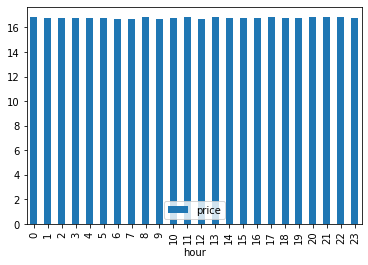

In [30]:
data_clean.groupby('hour')[['price']].mean().sort_values('hour').plot(kind='bar')

Dari visualisasi diatas didapatkan selama 24 jam , rata rata price cenderung sama. 

Melihat visualisasi antara day dan rata rata price

<AxesSubplot:xlabel='day'>

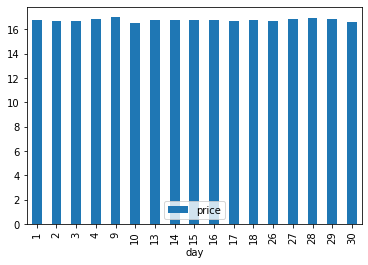

In [31]:
data_clean.groupby('day')[['price']].mean().sort_values('day').plot(kind='bar')

Dari visualisasi diatas didapatkan selama 30 hari , rata rata price cenderung sama.

Selanjutnya memisahkan atau split data menjadi train and test dan memisahkan data untuk model inference nantinya. 

In [32]:
#data untuk model inference
data_inf = data_clean.sample(5,random_state=15)
data_inf

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
519992,4,4,12,Beacon Hill,North End,Lyft,Lux,30.0,2.07,2.0,42.08,37.60,Mostly Cloudy,0.65,7.07,9.16,9.821,56.89,33.73,56.22,28.72,partly-cloudy-night,31.27,1003.93,313,0.67,43.10,56.89,40.05,56.22
365773,21,1,12,Theatre District,Boston University,Lyft,Lyft,10.5,3.14,1.0,40.20,38.55,Mostly Cloudy,0.65,3.03,3.03,9.454,44.11,34.58,43.44,35.23,partly-cloudy-night,29.53,1023.13,99,0.54,30.17,44.11,25.87,43.44
20561,8,30,11,Beacon Hill,North End,Lyft,Lux Black XL,30.0,2.02,1.0,30.09,30.09,Clear,0.85,2.25,2.25,9.864,42.68,31.50,40.69,27.80,clear-night,26.24,1014.80,307,0.00,28.78,42.68,26.32,40.69
16942,17,16,12,Fenway,North Station,Lyft,Lux,22.5,3.22,1.0,42.81,38.23,Overcast,0.75,7.54,8.94,9.956,43.63,34.00,38.40,28.27,cloudy,35.26,1016.68,72,1.00,38.49,43.63,33.55,38.40
350670,6,26,11,North Station,Northeastern University,Lyft,Lyft,11.0,3.39,1.0,41.83,41.83,Overcast,0.92,1.83,1.83,5.589,46.60,41.85,43.97,36.51,cloudy,39.60,1014.32,110,1.00,40.43,46.60,37.01,43.97


Menghapus data inference dari data_clean

In [33]:
# Menghapus Inference-Set dari Dataset

data_train_test = data_clean.drop(data_inf.index)
data_train_test

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,37.12,Mostly Cloudy,0.68,8.66,9.17,10.000,43.68,34.19,37.95,27.39,partly-cloudy-night,32.70,1021.98,57,0.72,39.89,43.68,33.73,38.07
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,37.35,Rain,0.94,11.98,11.98,4.786,47.30,42.10,43.92,36.20,rain,41.83,1003.97,90,1.00,40.49,47.30,36.20,43.92
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Clear,0.75,7.33,7.33,10.000,47.55,33.10,44.12,29.11,clear-night,31.10,992.28,240,0.03,35.36,47.55,31.04,44.12
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Clear,0.73,5.28,5.28,10.000,45.03,28.90,38.53,26.20,clear-night,26.64,1013.73,310,0.00,34.67,45.03,30.30,38.53
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,30.88,Partly Cloudy,0.70,9.14,9.14,10.000,42.18,36.71,35.75,30.29,partly-cloudy-night,28.61,998.36,303,0.44,33.10,42.18,29.11,35.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,West End,North End,Uber,WAV,9.5,1.00,1.0,37.05,37.05,Partly Cloudy,0.74,2.34,2.87,9.785,44.76,34.83,44.09,35.48,partly-cloudy-night,29.65,1023.57,133,0.31,31.42,44.76,27.77,44.09
693066,23,1,12,West End,North End,Uber,UberXL,13.0,1.00,1.0,37.05,37.05,Partly Cloudy,0.74,2.34,2.87,9.785,44.76,34.83,44.09,35.48,partly-cloudy-night,29.65,1023.57,133,0.31,31.42,44.76,27.77,44.09
693067,23,1,12,West End,North End,Uber,UberX,9.5,1.00,1.0,37.05,37.05,Partly Cloudy,0.74,2.34,2.87,9.785,44.76,34.83,44.09,35.48,partly-cloudy-night,29.65,1023.57,133,0.31,31.42,44.76,27.77,44.09
693069,23,1,12,West End,North End,Uber,Black SUV,27.0,1.00,1.0,37.05,37.05,Partly Cloudy,0.74,2.34,2.87,9.785,44.76,34.83,44.09,35.48,partly-cloudy-night,29.65,1023.57,133,0.31,31.42,44.76,27.77,44.09


In [34]:
# Reset Index 

data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)
data_inf

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,4,4,12,Beacon Hill,North End,Lyft,Lux,30.0,2.07,2.0,42.08,37.60,Mostly Cloudy,0.65,7.07,9.16,9.821,56.89,33.73,56.22,28.72,partly-cloudy-night,31.27,1003.93,313,0.67,43.10,56.89,40.05,56.22
1,21,1,12,Theatre District,Boston University,Lyft,Lyft,10.5,3.14,1.0,40.20,38.55,Mostly Cloudy,0.65,3.03,3.03,9.454,44.11,34.58,43.44,35.23,partly-cloudy-night,29.53,1023.13,99,0.54,30.17,44.11,25.87,43.44
2,8,30,11,Beacon Hill,North End,Lyft,Lux Black XL,30.0,2.02,1.0,30.09,30.09,Clear,0.85,2.25,2.25,9.864,42.68,31.50,40.69,27.80,clear-night,26.24,1014.80,307,0.00,28.78,42.68,26.32,40.69
3,17,16,12,Fenway,North Station,Lyft,Lux,22.5,3.22,1.0,42.81,38.23,Overcast,0.75,7.54,8.94,9.956,43.63,34.00,38.40,28.27,cloudy,35.26,1016.68,72,1.00,38.49,43.63,33.55,38.40
4,6,26,11,North Station,Northeastern University,Lyft,Lyft,11.0,3.39,1.0,41.83,41.83,Overcast,0.92,1.83,1.83,5.589,46.60,41.85,43.97,36.51,cloudy,39.60,1014.32,110,1.00,40.43,46.60,37.01,43.97


Split data train dan test dan menentukan feature dan target menggunakan train_test_split. Karena kita akan memprediksi harga maka target yang digunakan adalah price. 

In [35]:
# define feature and target
X = data_train_test.drop('price', axis=1)
y = data_train_test['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Melihat shape dari data  X_train, X_test, y_train, y_test

In [36]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(407442, 29)
(174619, 29)
(407442,)
(174619,)


Untuk digunakan dalam EDA for Modelling dataset yang digunakan adalah X_train, y_train dimasukan ke dalam df_eda.

In [37]:
# for EDA model 
df_eda = pd.concat([X_train, y_train], axis=1)

df_eda.shape

(407442, 30)

## EDA For Modelling

In [38]:
df_eda.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,short_summary,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
320317,10,27,11,Northeastern University,Beacon Hill,Lyft,Lyft,2.43,1.5,45.45,41.77,Light Rain,0.93,6.87,7.42,2.686,46.91,33.82,44.01,30.19,rain,43.52,989.98,79,1.00,36.34,46.91,32.43,44.01,11.0
384446,18,28,11,North End,Theatre District,Lyft,Shared,1.53,1.0,40.92,35.13,Overcast,0.64,9.21,15.03,10.000,42.61,37.60,36.57,32.12,cloudy,29.57,991.21,296,1.00,33.85,42.61,30.03,36.57,7.0
99391,9,17,12,North End,West End,Lyft,Lux Black XL,1.26,1.0,35.84,29.23,Drizzle,0.94,8.52,10.39,3.606,41.39,23.87,35.93,11.81,rain,34.25,1004.71,352,1.00,34.07,41.39,28.17,35.93,26.0
39778,1,2,12,Haymarket Square,Back Bay,Uber,WAV,2.30,1.0,35.52,35.52,Clear,0.82,1.85,2.37,9.846,44.65,34.88,43.98,35.53,clear-night,30.46,1023.52,146,0.12,31.57,44.65,28.10,43.98,11.5
561640,21,28,11,Back Bay,South Station,Lyft,Lyft,1.37,1.0,41.35,35.62,Overcast,0.60,9.29,11.60,10.000,42.60,37.33,36.56,31.82,cloudy,28.39,993.87,295,1.00,33.70,42.60,29.88,36.56,7.0


Memisahkan antara numerical dan kategorical data. 

In [39]:
# get name columns for data type numeric and categoric
num_col = df_eda.select_dtypes(exclude=['object']).columns.tolist()
cat_col = df_eda.select_dtypes(include=['object']).columns.tolist()

### Numerical Future

Menampilkan hanya numerical colomn 

In [40]:
df_eda[num_col].head()

,hour,day,month,distance,surge_multiplier,temperature,apparentTemperature,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
320317,10,27,11,2.43,1.5,45.45,41.77,0.93,6.87,7.42,2.686,46.91,33.82,44.01,30.19,43.52,989.98,79,1.00,36.34,46.91,32.43,44.01,11.0
384446,18,28,11,1.53,1.0,40.92,35.13,0.64,9.21,15.03,10.000,42.61,37.60,36.57,32.12,29.57,991.21,296,1.00,33.85,42.61,30.03,36.57,7.0
99391,9,17,12,1.26,1.0,35.84,29.23,0.94,8.52,10.39,3.606,41.39,23.87,35.93,11.81,34.25,1004.71,352,1.00,34.07,41.39,28.17,35.93,26.0
39778,1,2,12,2.30,1.0,35.52,35.52,0.82,1.85,2.37,9.846,44.65,34.88,43.98,35.53,30.46,1023.52,146,0.12,31.57,44.65,28.10,43.98,11.5
561640,21,28,11,1.37,1.0,41.35,35.62,0.60,9.29,11.60,10.000,42.60,37.33,36.56,31.82,28.39,993.87,295,1.00,33.70,42.60,29.88,36.56,7.0


Menampilkan ukuran dari numerical kolom 

In [41]:
df_eda[num_col].shape

(407442, 24)

Menghitung nilai skew dari masing masing kolom di dalam numerical categori

In [42]:
skew = df_eda[num_col].skew()
nilai_skew = pd.DataFrame(skew)
nilai_skew.columns =['value']

nilai_skew

,value
hour,-0.042146
day,-0.345741
month,-0.399731
distance,0.824967
surge_multiplier,7.609289
temperature,-0.602798
apparentTemperature,-0.400728
humidity,-0.081115
windSpeed,0.475823
windGust,1.146199


Membuat fungsi for loop untuk menambah kolom, melihat nilai skew termasuk distribusi normal atau tidak.

In [43]:
nilai_skew['distribusi']=0
for i in nilai_skew.index:
  if (nilai_skew["value"][i]>= -0.5) & (nilai_skew["value"][i] <= 0.5):
    nilai_skew["distribusi"][i]='normal'
  else:
    nilai_skew["distribusi"][i]='tidak normal'
nilai_skew

,value,distribusi
hour,-0.042146,normal
day,-0.345741,normal
month,-0.399731,normal
distance,0.824967,tidak normal
surge_multiplier,7.609289,tidak normal
temperature,-0.602798,tidak normal
apparentTemperature,-0.400728,normal
humidity,-0.081115,normal
windSpeed,0.475823,normal
windGust,1.146199,tidak normal


In [44]:
nilai_skew['distribusi'].value_counts()

normal          12
tidak normal    12
Name: distribusi, dtype: int64

Didapatkan nilai bahwa distribusi keduanya seimbang dengan total 12 normal, dan 12 tidak normal

In [45]:
# new variable for plot purpose
numerical = df_eda[num_col]
numerical.head()

,hour,day,month,distance,surge_multiplier,temperature,apparentTemperature,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
320317,10,27,11,2.43,1.5,45.45,41.77,0.93,6.87,7.42,2.686,46.91,33.82,44.01,30.19,43.52,989.98,79,1.00,36.34,46.91,32.43,44.01,11.0
384446,18,28,11,1.53,1.0,40.92,35.13,0.64,9.21,15.03,10.000,42.61,37.60,36.57,32.12,29.57,991.21,296,1.00,33.85,42.61,30.03,36.57,7.0
99391,9,17,12,1.26,1.0,35.84,29.23,0.94,8.52,10.39,3.606,41.39,23.87,35.93,11.81,34.25,1004.71,352,1.00,34.07,41.39,28.17,35.93,26.0
39778,1,2,12,2.30,1.0,35.52,35.52,0.82,1.85,2.37,9.846,44.65,34.88,43.98,35.53,30.46,1023.52,146,0.12,31.57,44.65,28.10,43.98,11.5
561640,21,28,11,1.37,1.0,41.35,35.62,0.60,9.29,11.60,10.000,42.60,37.33,36.56,31.82,28.39,993.87,295,1.00,33.70,42.60,29.88,36.56,7.0


Membuat fungsi untuk membuat visualisasi diagnostic_plots dalam bentuk histogram dan boxplot 

In [46]:
def diagnostic_plots(numerical, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numerical[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=numerical[variable])
    plt.title('Boxplot')

    plt.show()

Jika tadi sudah melihat nilai skew nya, kita akan melihat visualisasi nya agar lebih jelas

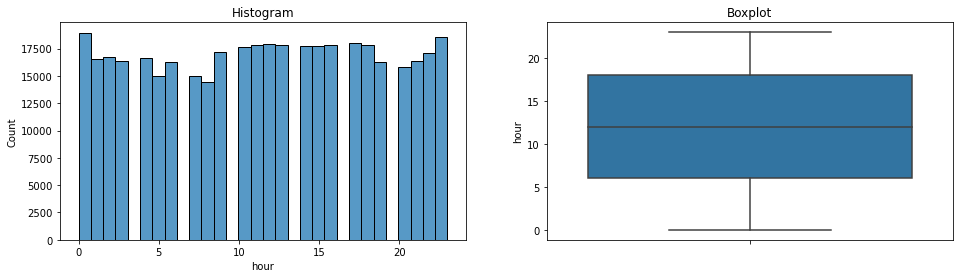

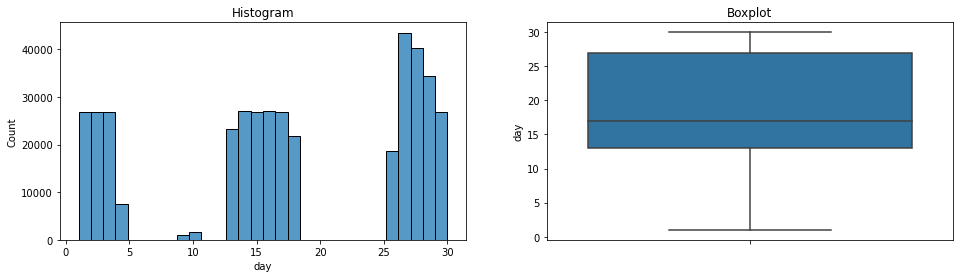

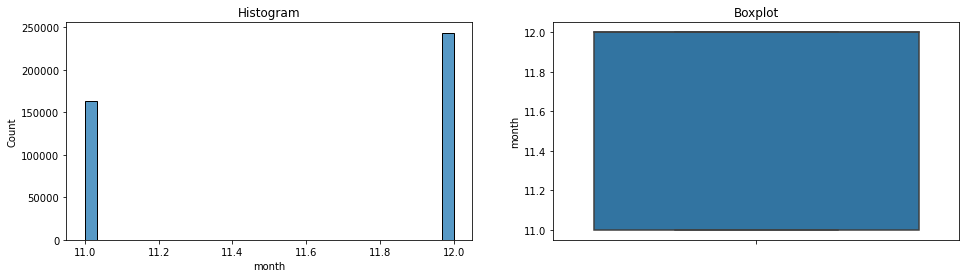

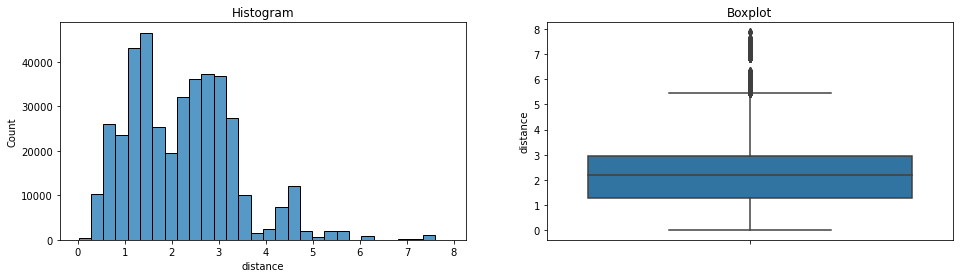

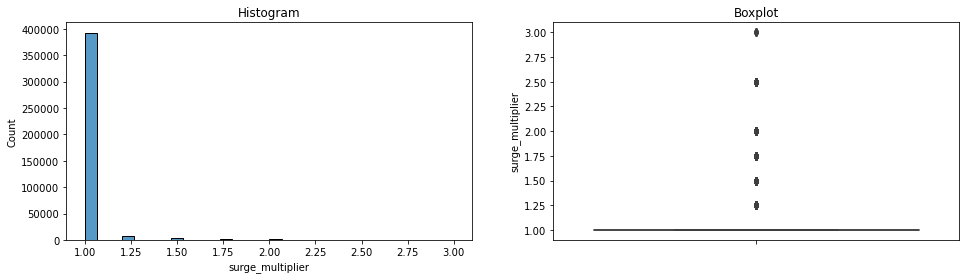

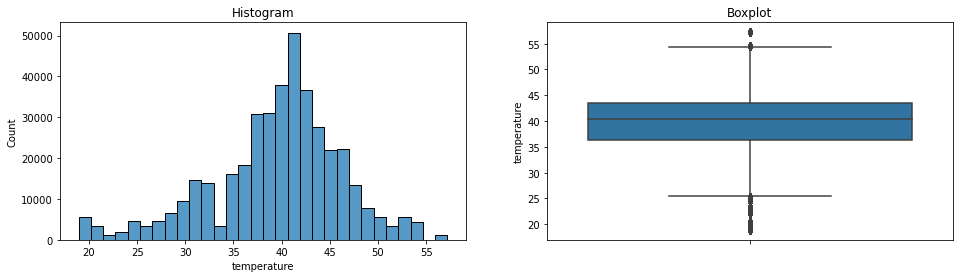

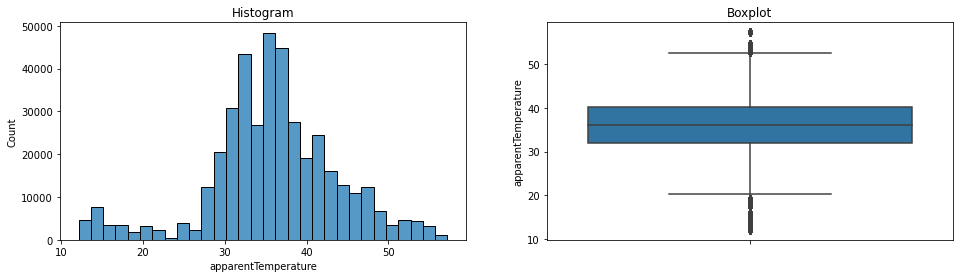

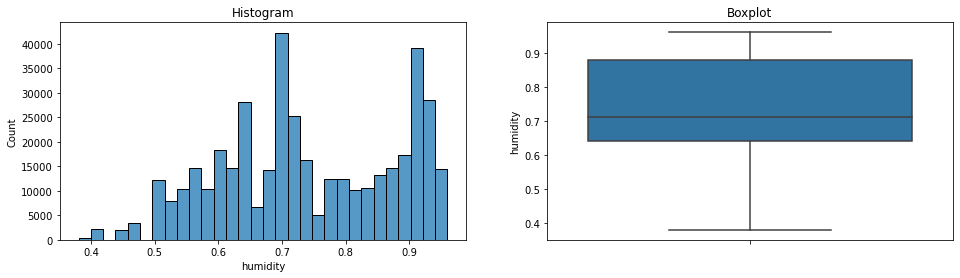

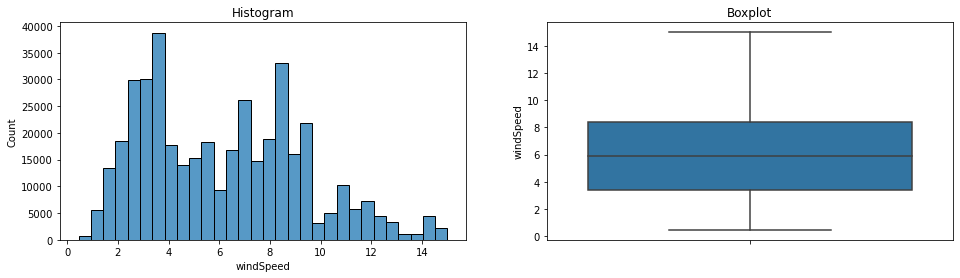

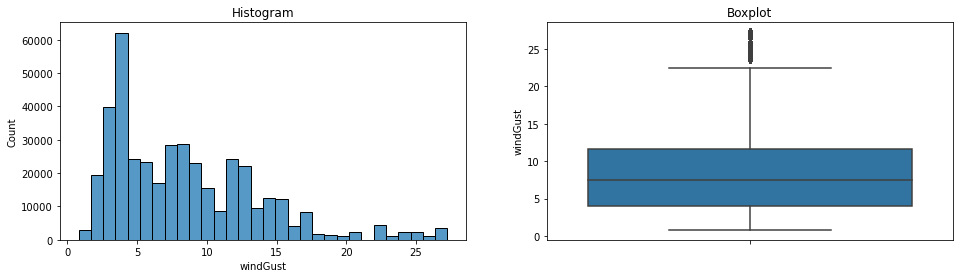

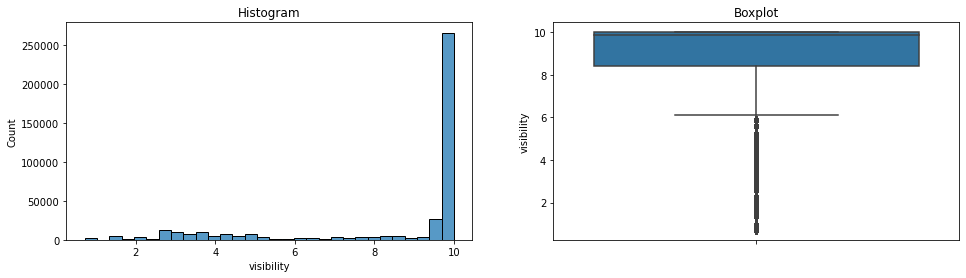

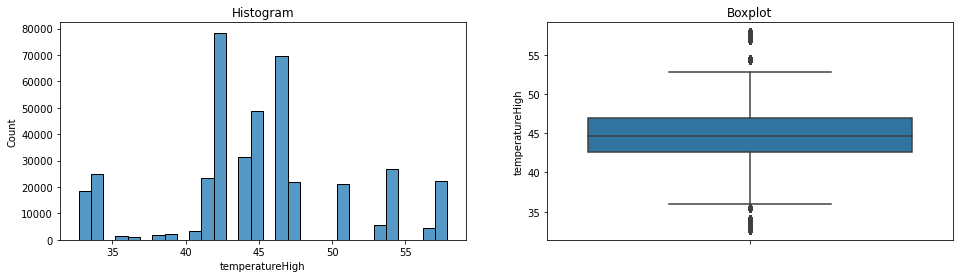

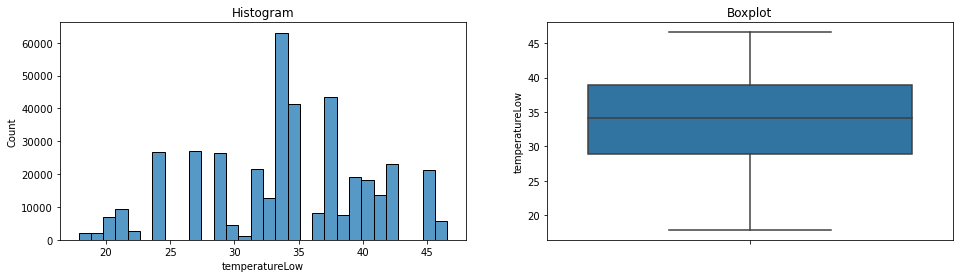

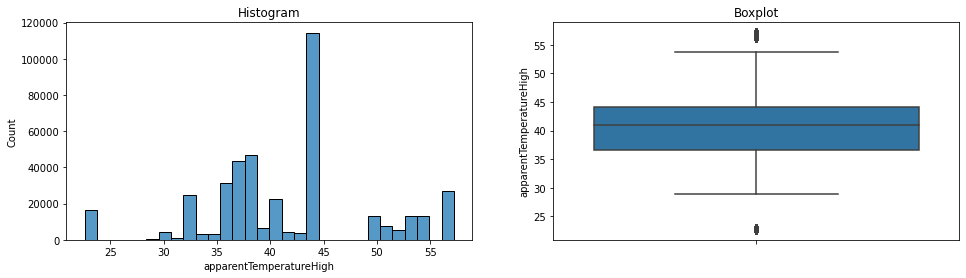

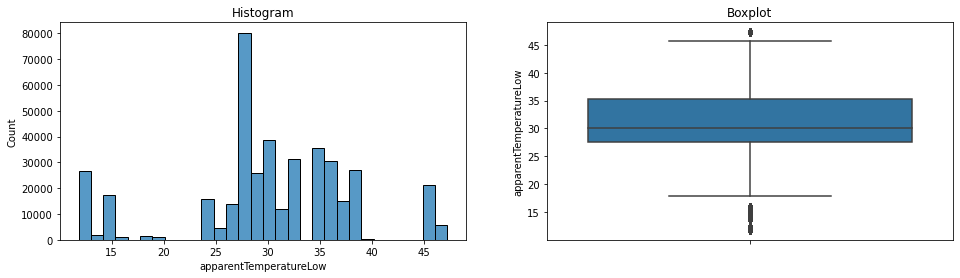

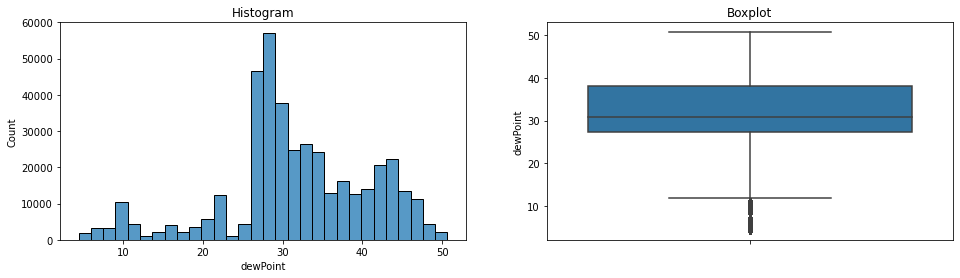

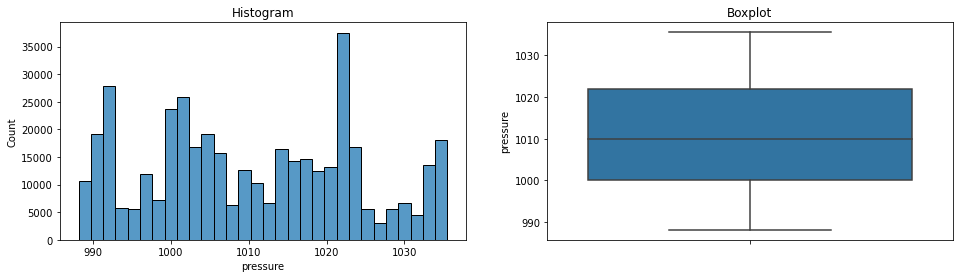

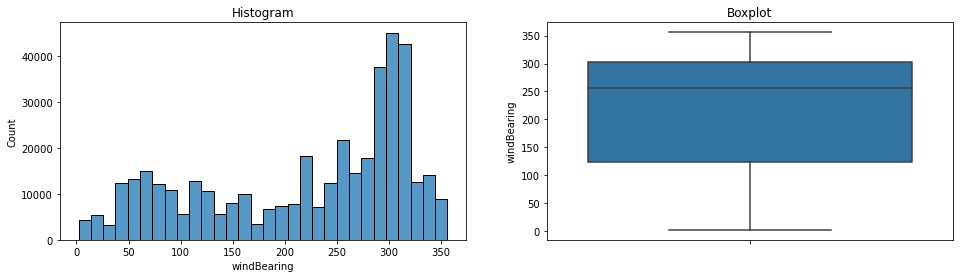

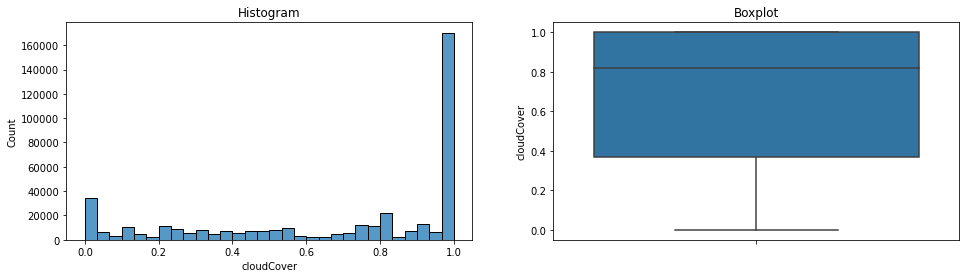

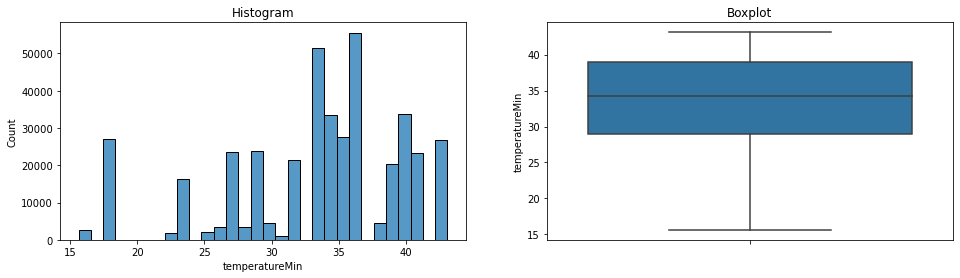

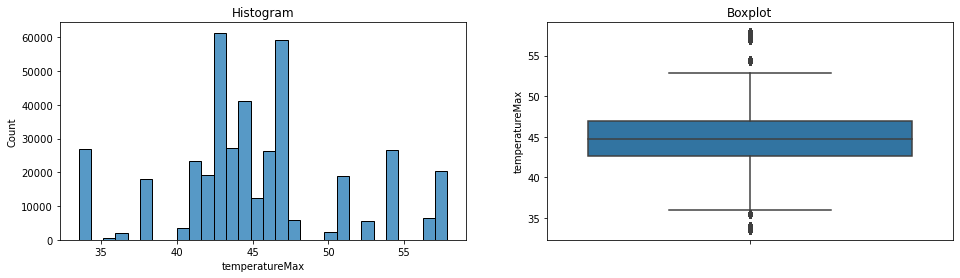

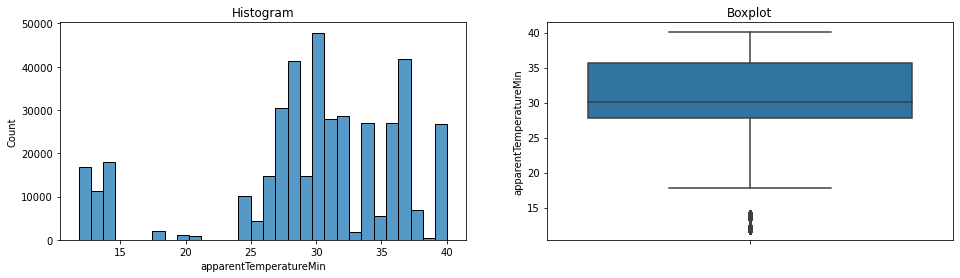

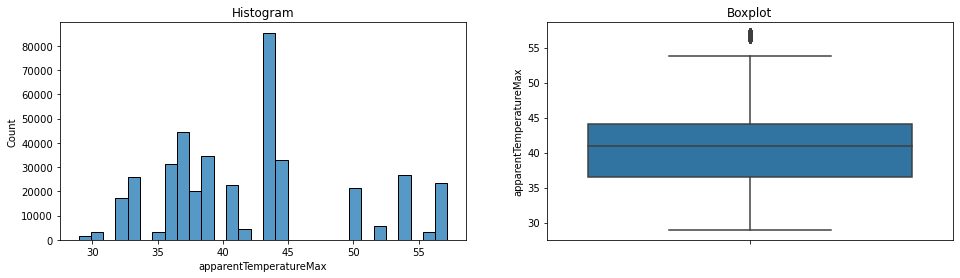

In [47]:
diagnostic_plots(numerical, 'hour')
diagnostic_plots(numerical, 'day')
diagnostic_plots(numerical, 'month')
diagnostic_plots(numerical, 'distance')
diagnostic_plots(numerical, 'surge_multiplier')
diagnostic_plots(numerical, 'temperature')
diagnostic_plots(numerical, 'apparentTemperature')
diagnostic_plots(numerical, 'humidity')
diagnostic_plots(numerical, 'windSpeed')
diagnostic_plots(numerical, 'windGust')
diagnostic_plots(numerical, 'visibility')
diagnostic_plots(numerical, 'temperatureHigh')
diagnostic_plots(numerical, 'temperatureLow')
diagnostic_plots(numerical, 'apparentTemperatureHigh')
diagnostic_plots(numerical, 'apparentTemperatureLow')
diagnostic_plots(numerical, 'dewPoint')
diagnostic_plots(numerical, 'pressure')
diagnostic_plots(numerical, 'windBearing')
diagnostic_plots(numerical, 'cloudCover')
diagnostic_plots(numerical, 'temperatureMin')
diagnostic_plots(numerical, 'temperatureMax')
diagnostic_plots(numerical, 'apparentTemperatureMin')
diagnostic_plots(numerical, 'apparentTemperatureMax')



Dari hasil visualisasi , bisa dilihat bahwa persebaran distribusi hasilnya sebanding, maka kita akan menggunakan handling outlier secara distribusi normal. 

In [48]:
df_eda[num_col].columns

Index(['hour', 'day', 'month', 'distance', 'surge_multiplier', 'temperature',
       'apparentTemperature', 'humidity', 'windSpeed', 'windGust',
       'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'temperatureMin',
       'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax',
       'price'],
      dtype='object')

Menggunakan winsorizer untuk capping outlier dengan capping_method gaussian dan nilai fold = 3, karena distribusi normal

In [49]:
# capping outlier 
wins = Winsorizer(capping_method='gaussian', tail='both', fold=3, 
variables=['hour', 'day', 'month', 'distance', 'temperature',
       'apparentTemperature', 'humidity', 'windSpeed', 'windGust',
       'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'temperatureMin',
       'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax',
       'price','surge_multiplier'])

df_eda_cleaned = wins.fit_transform(df_eda)

Membandingkan central tendency sebelum dan setelah handling outlier

In [50]:
# Compare before and after outlier handling
print('before handling: \n', df_eda[num_col].describe())

print('after handling: \n', df_eda_cleaned[num_col].describe())

before handling: 
                 hour            day          month       distance  \
count  407442.000000  407442.000000  407442.000000  407442.000000   
mean       11.611407      17.608752      11.597994       2.216466   
std         6.939294       9.968951       0.490304       1.137783   
min         0.000000       1.000000      11.000000       0.020000   
25%         6.000000      13.000000      11.000000       1.300000   
50%        12.000000      17.000000      12.000000       2.190000   
75%        18.000000      27.000000      12.000000       2.960000   
max        23.000000      30.000000      12.000000       7.860000   

       surge_multiplier    temperature  apparentTemperature       humidity  \
count     407442.000000  407442.000000        407442.000000  407442.000000   
mean           1.016523      39.562685            35.888674       0.740956   
std            0.099968       6.785587             7.990219       0.139136   
min            1.000000      18.910000         

In [51]:
df_eda_cleaned.shape

(407442, 30)

Setelah di handling outlier nya sisa data saat ini 407442 baris, dan 30 kolom.

### Categorical Features

In [52]:
# membuat temporary variable
dfcategory= df_eda_cleaned[cat_col+ ['price']]

dfcategory.head()

,source,destination,cab_type,name,short_summary,icon,price
320317,Northeastern University,Beacon Hill,Lyft,Lyft,Light Rain,rain,11.0
384446,North End,Theatre District,Lyft,Shared,Overcast,cloudy,7.0
99391,North End,West End,Lyft,Lux Black XL,Drizzle,rain,26.0
39778,Haymarket Square,Back Bay,Uber,WAV,Clear,clear-night,11.5
561640,Back Bay,South Station,Lyft,Lyft,Overcast,cloudy,7.0


melihat jumlah unique label di setiap kolom 

In [53]:
for i in dfcategory.columns.tolist():
    print(f'num of unique label in {i}: ', len(dfcategory[i].unique()))

num of unique label in source:  12
num of unique label in destination:  12
num of unique label in cab_type:  2
num of unique label in name:  12
num of unique label in short_summary:  9
num of unique label in icon:  7
num of unique label in price:  91


Melihat value counts dan overview data 

In [54]:
for i in dfcategory.columns.tolist():
    print(i, '\n')
    print(dfcategory[i].value_counts())
    print('-'*30)

source 

South Station              35214
Northeastern University    34598
Fenway                     34481
Back Bay                   34439
North End                  34254
Financial District         33973
Beacon Hill                33964
Boston University          33909
Theatre District           33392
Haymarket Square           33353
West End                   33245
North Station              32620
Name: source, dtype: int64
------------------------------
destination 

Financial District         35323
Northeastern University    34914
Back Bay                   34496
Theatre District           34398
West End                   34325
North End                  34052
Beacon Hill                34043
Boston University          33868
North Station              33224
Fenway                     33034
South Station              32947
Haymarket Square           32818
Name: destination, dtype: int64
------------------------------
cab_type 

Lyft    205208
Uber    202234
Name: cab_type, dtype: 

Setelah overview data pada kolom categori, selanjutnya akan di drop kolom 'source','destination','cab_type','short_summary'. 
Source dan destination sudah diwakilkan dengan adanya distance. untuk cab_type sudah diwakilkan dengan name. Selanjutnya untuk short_sumarry sudah diwakilkan dengan icon. 

In [55]:
dfcategory.drop(['source','destination','cab_type','short_summary'], axis=1, inplace=True)

In [56]:
dfcategory.columns

Index(['name', 'icon', 'price'], dtype='object')

Kolom yang tersisa dari kategori adalah name dan icon. Selanjutnya melihat value_counts didalan kolom name dan icon.

In [57]:
for i in ['name', 'icon']:
    print(dfcategory[i].value_counts())
    print('-'*30)

Lux Black XL    34713
UberXL          34452
Shared          34402
Black SUV       34315
Black           34142
Lyft XL         34122
Lux Black       34032
Lyft            34023
UberPool        34005
Lux             33916
UberX           32723
WAV             32597
Name: name, dtype: int64
------------------------------
 cloudy                  129200
 partly-cloudy-night      92261
 partly-cloudy-day        67482
 rain                     60988
 clear-night              36161
 clear-day                16005
 fog                       5345
Name: icon, dtype: int64
------------------------------


Berdasarkan personal assumption, kolom name dan icon akan saya encode ke dalam jenis ordinal, berdasarkan hasil pengamatan dan searching google terdapat kategori dari jenis jenis name yang bisa diurutkan sbb : 'Shared','WAV','UberPool','UberX','Lyft','UberXL','Lyft XL','Black','Black SUV','Lux','Lux Black','Lux Black XL'. Sedangkan untuk icon, pengaruh cuaca ini mempengaruhi price dimana jika sedang siang hari harga akan berbeda dengan malam hari, begitu juga jika hujan atau fog. Maka saya urutkan sbb: clear-night ',' clear-day ',' partly-cloudy-night ',' partly-cloudy-day ',' cloudy ',' fog ', ' rain'.



Data Encoding menggunakan Ordinal Encoder 

In [58]:
name_cat = ['Shared','WAV','UberPool','UberX','Lyft','UberXL','Lyft XL','Black','Black SUV','Lux','Lux Black','Lux Black XL']

icon_cat = [' clear-night ',' clear-day ',' partly-cloudy-night ',' partly-cloudy-day ',' cloudy ',' fog ', ' rain ']


ord_enc = OrdinalEncoder(categories=[name_cat, icon_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(dfcategory[['name','icon']]))

cat_ord.columns = ['name_encod','icon_encod']
hasil = pd.concat([dfcategory[['name','icon']].reset_index(drop=True), cat_ord], axis=1)

hasil

,name,icon,name_encod,icon_encod
0,Lyft,rain,4.0,6.0
1,Shared,cloudy,0.0,4.0
2,Lux Black XL,rain,11.0,6.0
3,WAV,clear-night,1.0,0.0
4,Lyft,cloudy,4.0,4.0
...,...,...,...,...
407437,Lyft,partly-cloudy-night,4.0,2.0
407438,Lux,rain,9.0,6.0
407439,UberX,partly-cloudy-night,3.0,2.0
407440,Black SUV,cloudy,8.0,4.0


Menggabungkan numerical and categorical ke dalam df_combines

In [59]:
df_combines = pd.concat([df_eda_cleaned.reset_index(drop=True), cat_ord], axis=1)
df_combines.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,short_summary,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price,name_encod,icon_encod
0,10,27,11,Northeastern University,Beacon Hill,Lyft,Lyft,2.43,1.316428,45.45,41.77,Light Rain,0.93,6.87,7.42,2.686,46.91,33.82,44.01,30.19,rain,43.52,989.98,79,1.00,36.34,46.91,32.43,44.01,11.0,4.0,6.0
1,18,28,11,North End,Theatre District,Lyft,Shared,1.53,1.000000,40.92,35.13,Overcast,0.64,9.21,15.03,10.000,42.61,37.60,36.57,32.12,cloudy,29.57,991.21,296,1.00,33.85,42.61,30.03,36.57,7.0,0.0,4.0
2,9,17,12,North End,West End,Lyft,Lux Black XL,1.26,1.000000,35.84,29.23,Drizzle,0.94,8.52,10.39,3.606,41.39,23.87,35.93,11.81,rain,34.25,1004.71,352,1.00,34.07,41.39,28.17,35.93,26.0,11.0,6.0
3,1,2,12,Haymarket Square,Back Bay,Uber,WAV,2.30,1.000000,35.52,35.52,Clear,0.82,1.85,2.37,9.846,44.65,34.88,43.98,35.53,clear-night,30.46,1023.52,146,0.12,31.57,44.65,28.10,43.98,11.5,1.0,0.0
4,21,28,11,Back Bay,South Station,Lyft,Lyft,1.37,1.000000,41.35,35.62,Overcast,0.60,9.29,11.60,10.000,42.60,37.33,36.56,31.82,cloudy,28.39,993.87,295,1.00,33.70,42.60,29.88,36.56,7.0,4.0,4.0


Feature Selection Using Heatmap Correlation

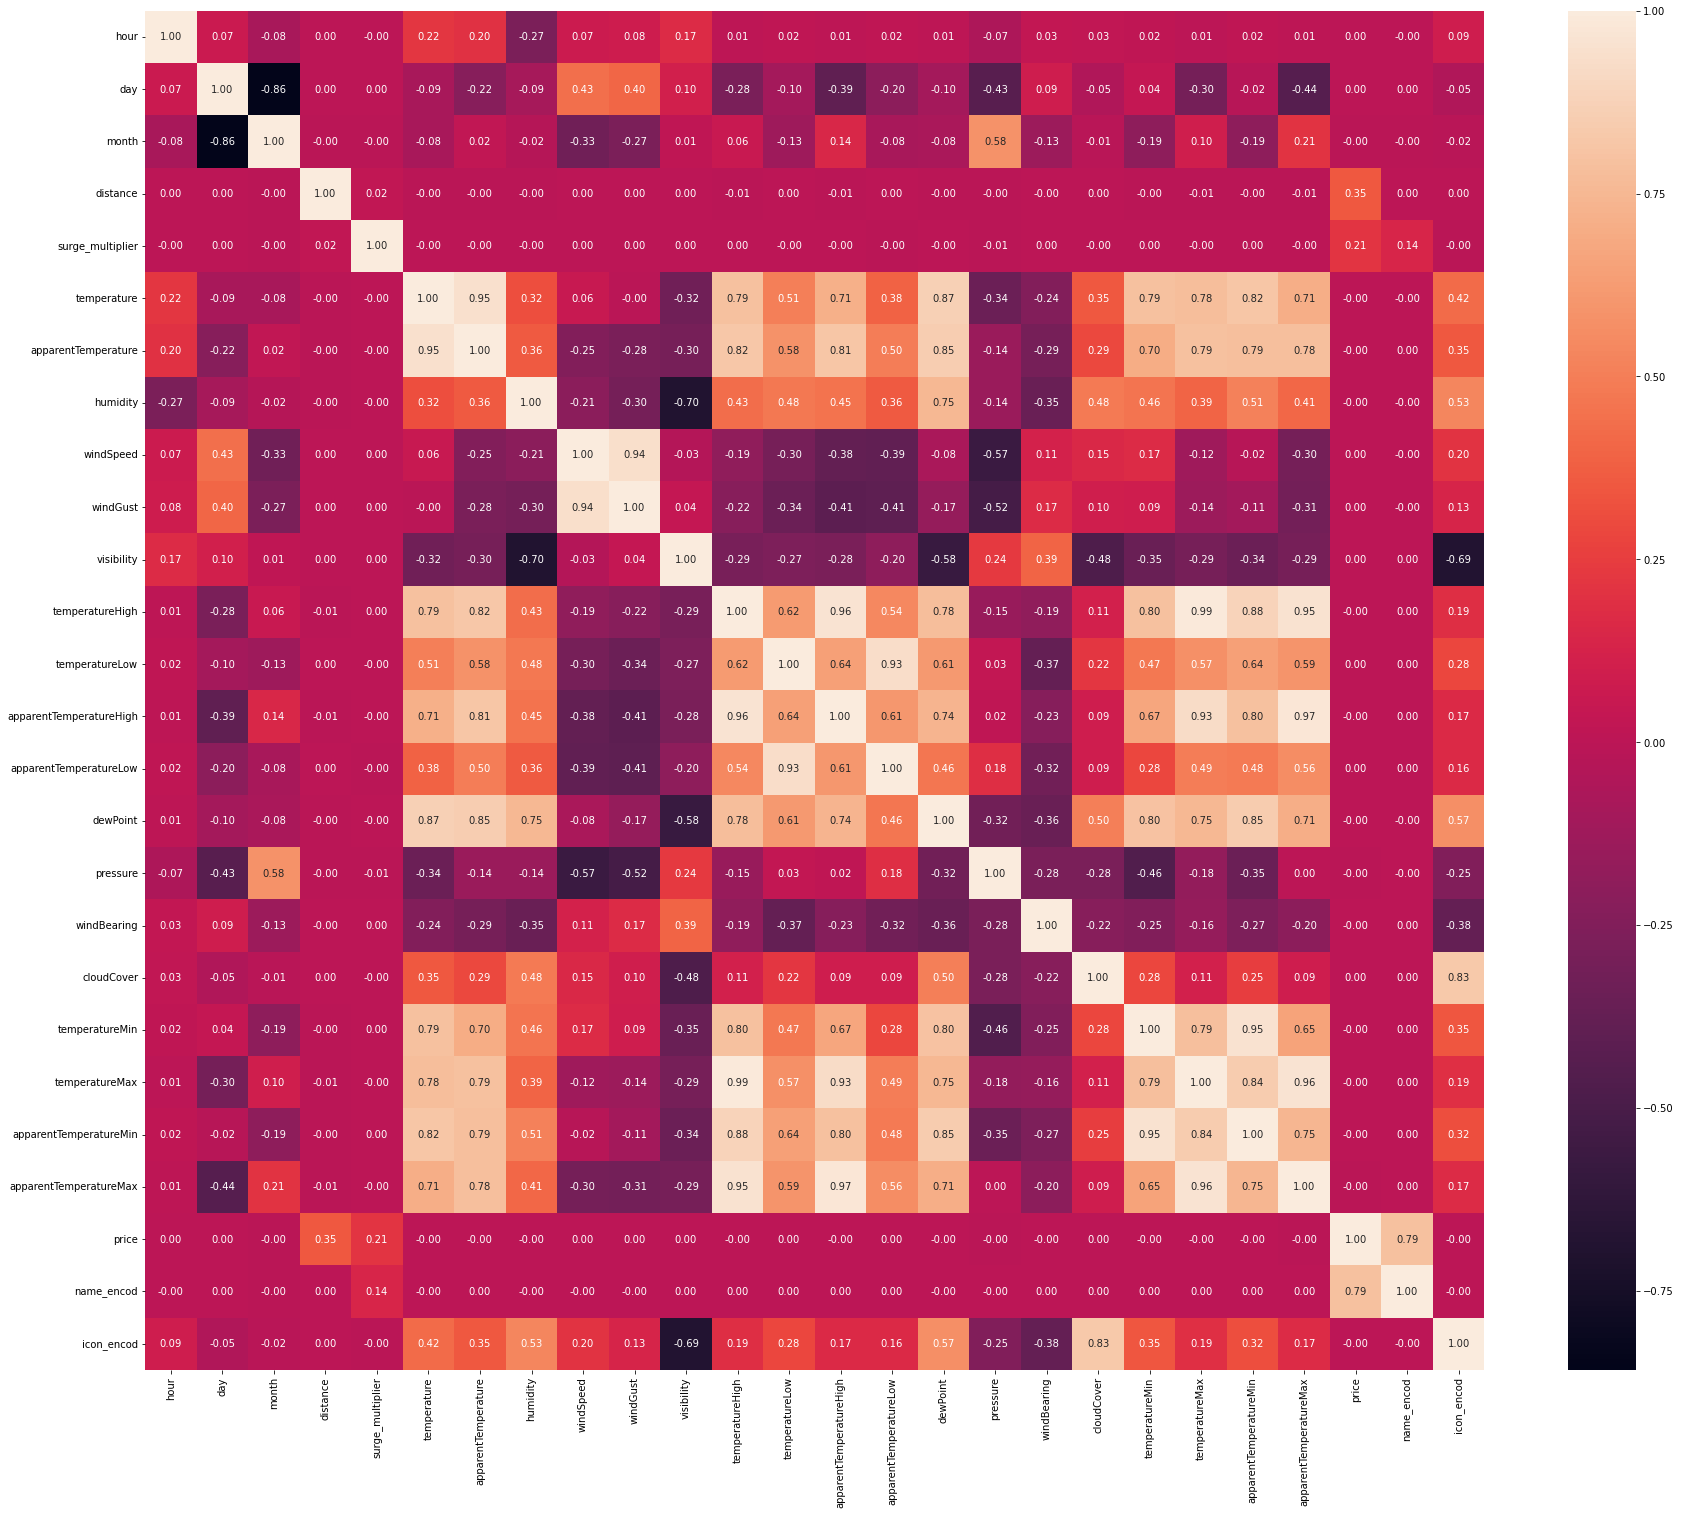

In [60]:
plt.figure(figsize=(30,25))
sns.heatmap(df_combines.corr(), annot=True, fmt='.2f')
plt.show()


Pemilihan feature selection menggunakan heatmap didapatkan bahwa yang berkorelasi kuat adalah data distance, surge_multiplier, dan name_encod. 
- distance terhadap price dengan nilai 0.35
- surge_multiplier terhadap price dengan nilai 0.14 
- name_encod terhadap price dengan nilai 0.79
Untuk itu yang akan dijadikan sebagai feature adalah ketiga kolom tersebut. Target nya adalah price.

In [61]:
df_combines.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name',
       'distance', 'surge_multiplier', 'temperature', 'apparentTemperature',
       'short_summary', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'icon', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax', 'price',
       'name_encod', 'icon_encod'],
      dtype='object')

Feature dan target dimasukan kedalam df_models

In [62]:
df_models = df_combines[['distance', 'surge_multiplier', 'price', 'name_encod']]
df_models.head()

,distance,surge_multiplier,price,name_encod
0,2.43,1.316428,11.0,4.0
1,1.53,1.000000,7.0,0.0
2,1.26,1.000000,26.0,11.0
3,2.30,1.000000,11.5,1.0
4,1.37,1.000000,7.0,4.0


### Numerical Scaling

Proses selanjutnya adalah numerical scalling

In [63]:
# numerical scaling

num_column = ['distance', 'surge_multiplier']
scaler = StandardScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(df_models[num_column]))
num_scaled.columns = num_column

df_models.drop(num_column, axis=1, inplace=True)
df_models = pd.concat([df_models, num_scaled], axis=1)

df_models = df_models[['distance', 'surge_multiplier', 'name_encod','price',]]
df_models.head(3)

,distance,surge_multiplier,name_encod,price
0,0.198913,5.804622,4.0,11.0
1,-0.611563,-0.191728,0.0,7.0
2,-0.854705,-0.191728,11.0,26.0


## Preprocess

Proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan. 

In [64]:
testing = pd.concat([X_test, y_test], axis=1)
testing.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,short_summary,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
286201,4,18,12,West End,Northeastern University,Lyft,Lux,3.06,1.0,37.21,31.90,Overcast,0.69,6.79,11.31,9.732,41.42,23.89,35.95,11.83,cloudy,28.04,1000.92,272,1.00,34.07,41.42,28.11,35.95,22.5
208034,16,26,11,Beacon Hill,Fenway,Uber,Black,2.32,1.0,45.80,43.94,Overcast,0.89,4.10,4.30,9.579,46.59,41.77,43.97,36.47,cloudy,42.84,1013.62,115,1.00,40.35,46.59,36.96,43.97,21.0
90262,0,2,12,Beacon Hill,North End,Uber,UberXL,1.52,1.0,35.68,35.68,Clear,0.81,1.83,2.53,9.857,44.66,35.04,43.99,35.69,clear-night,30.32,1023.60,157,0.00,31.71,44.66,28.06,43.99,13.5
247834,1,29,11,West End,North End,Uber,Black,1.00,1.0,38.42,32.45,Mostly Cloudy,0.72,8.41,11.54,9.915,42.61,37.60,36.57,32.12,partly-cloudy-night,30.30,996.92,297,0.77,33.85,42.61,30.03,36.57,17.0
307008,13,16,12,Boston University,Beacon Hill,Lyft,Lux Black XL,2.67,1.0,42.11,37.54,Overcast,0.70,7.26,8.97,9.779,43.80,34.18,38.35,28.19,cloudy,32.91,1022.24,83,0.91,39.28,43.80,33.84,38.35,30.0


Data testing di Transformasi dengan tujuan utama untuk mengubah skala pengukuran data asli menjadi bentuk lain sehingga data dapat memenuhi asumsi-asumsi yang mendasari analisis ragam

In [65]:
testing = wins.transform(testing)
testing.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,short_summary,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
286201,4,18,12,West End,Northeastern University,Lyft,Lux,3.06,1.0,37.21,31.90,Overcast,0.69,6.79,11.31,9.732,41.42,23.89,35.95,11.83,cloudy,28.04,1000.92,272,1.00,34.07,41.42,28.11,35.95,22.5
208034,16,26,11,Beacon Hill,Fenway,Uber,Black,2.32,1.0,45.80,43.94,Overcast,0.89,4.10,4.30,9.579,46.59,41.77,43.97,36.47,cloudy,42.84,1013.62,115,1.00,40.35,46.59,36.96,43.97,21.0
90262,0,2,12,Beacon Hill,North End,Uber,UberXL,1.52,1.0,35.68,35.68,Clear,0.81,1.83,2.53,9.857,44.66,35.04,43.99,35.69,clear-night,30.32,1023.60,157,0.00,31.71,44.66,28.06,43.99,13.5
247834,1,29,11,West End,North End,Uber,Black,1.00,1.0,38.42,32.45,Mostly Cloudy,0.72,8.41,11.54,9.915,42.61,37.60,36.57,32.12,partly-cloudy-night,30.30,996.92,297,0.77,33.85,42.61,30.03,36.57,17.0
307008,13,16,12,Boston University,Beacon Hill,Lyft,Lux Black XL,2.67,1.0,42.11,37.54,Overcast,0.70,7.26,8.97,9.779,43.80,34.18,38.35,28.19,cloudy,32.91,1022.24,83,0.91,39.28,43.80,33.84,38.35,30.0


Membagi kembali data kedalam numeric dan ketegorical 

In [66]:
num_testing = testing.select_dtypes(exclude=['object']).columns.tolist()
cat_testing = testing.select_dtypes(include=['object']).columns.tolist()

In [67]:
cat_testing

['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']

menggabungkan data testing bagian kategori ditambah price

In [68]:
testing_category = testing[cat_testing + ['price']]

testing_category.head(2)

,source,destination,cab_type,name,short_summary,icon,price
286201,West End,Northeastern University,Lyft,Lux,Overcast,cloudy,22.5
208034,Beacon Hill,Fenway,Uber,Black,Overcast,cloudy,21.0


menghapus kolom yang tidak digunakan untuk feature

In [69]:
columns_obj= ['source', 'destination', 'cab_type', 'short_summary']
testing_category= testing_category.drop(columns_obj, axis=1)

Melakukan Ordinal Encoder

In [70]:
# ordinal encoder
cat_ord_testing = pd.DataFrame(ord_enc.transform(testing_category[['name','icon']]))
cat_ord_testing.columns = ['name_encod','icon_encod']

testing_model = pd.concat([testing.reset_index(drop=True), cat_ord_testing], axis=1)
testing_model.head(3)

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,short_summary,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price,name_encod,icon_encod
0,4,18,12,West End,Northeastern University,Lyft,Lux,3.06,1.0,37.21,31.90,Overcast,0.69,6.79,11.31,9.732,41.42,23.89,35.95,11.83,cloudy,28.04,1000.92,272,1.0,34.07,41.42,28.11,35.95,22.5,9.0,4.0
1,16,26,11,Beacon Hill,Fenway,Uber,Black,2.32,1.0,45.80,43.94,Overcast,0.89,4.10,4.30,9.579,46.59,41.77,43.97,36.47,cloudy,42.84,1013.62,115,1.0,40.35,46.59,36.96,43.97,21.0,7.0,4.0
2,0,2,12,Beacon Hill,North End,Uber,UberXL,1.52,1.0,35.68,35.68,Clear,0.81,1.83,2.53,9.857,44.66,35.04,43.99,35.69,clear-night,30.32,1023.60,157,0.0,31.71,44.66,28.06,43.99,13.5,5.0,0.0


In [71]:
testing_models = testing_model[['distance', 'surge_multiplier', 'name_encod', 'price']]
testing_models.head(3)

,distance,surge_multiplier,name_encod,price
0,3.06,1.0,9.0,22.5
1,2.32,1.0,7.0,21.0
2,1.52,1.0,5.0,13.5


melakukan numerical scaling untuk data testing

In [72]:
# numerical scaling

num_scaled_testing = pd.DataFrame(scaler.transform(testing_models[num_column]))
num_scaled_testing.columns = num_column

testing_models.drop(num_column, axis=1, inplace=True)
testing_models = pd.concat([testing_models, num_scaled_testing], axis=1)

testing_models = testing_models[['distance', 'surge_multiplier', 'name_encod', 'price']]
testing_models.head(2)

,distance,surge_multiplier,name_encod,price
0,0.766246,-0.191728,9.0,22.5
1,0.099855,-0.191728,7.0,21.0


In [73]:
X_train = df_models.drop('price',axis=1).copy()
y_train = df_models['price']

X_test = testing_models.drop('price',axis=1).copy()
y_test = testing_models['price']

## Model Building

Model yang akan digunakan adalah LinearRegression

In [74]:
# linear regression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

pred_train = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

## Model Evaluation 

In [75]:
print('train: ', mean_absolute_error(y_train, pred_train))
print('test: ', mean_absolute_error(y_test, pred_test))

train:  3.5278622724959963
test:  3.5268640827821307


Dengan menggunakan MAE didapatkan hasil yaitu bestfit, antara nilai dan train dan test 

Menggunakna perbandingan nilai error menggunakan MAE, R2 Score ,RMSE pada data Train 

In [76]:
# Hasil pengukuran Eror pada data Train 
print('MAE : ',mean_absolute_error(y_train,pred_train))
print('R2 Score : ',r2_score(y_train,pred_train))
print('RMSE : ',np.sqrt(mean_squared_error(y_train,pred_train)))

MAE :  3.5278622724959963
R2 Score :  0.7573005750788024
RMSE :  4.545665836191051


Menggunakna perbandingan nilai error menggunakan MAE, R2 Score ,RMSE pada data Test 

In [77]:
# Hasil Pengukuran Eror pada data Test
print("MAE : ",mean_absolute_error(y_test,pred_test))
print("R2 Score : ",r2_score(y_test,pred_test))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred_test)))

MAE :  3.5268640827821307
R2 Score :  0.7571992225489667
RMSE :  4.549925611529467


In [78]:
df_models['price'].mean()

16.71558699383869

Dari hasil penerapan model diatas didaptkan bahwa nilai error lebih kecil dari mean, dan antara hasil train dan test hasilnya bestfit. Dapat diasumsikan bahwa pemilihan feature sudah tepat.

## Model Inference

Memanggil data inference yang sudah dibuat tadi dengan nama data_inf

In [79]:
data_inf

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,4,4,12,Beacon Hill,North End,Lyft,Lux,30.0,2.07,2.0,42.08,37.60,Mostly Cloudy,0.65,7.07,9.16,9.821,56.89,33.73,56.22,28.72,partly-cloudy-night,31.27,1003.93,313,0.67,43.10,56.89,40.05,56.22
1,21,1,12,Theatre District,Boston University,Lyft,Lyft,10.5,3.14,1.0,40.20,38.55,Mostly Cloudy,0.65,3.03,3.03,9.454,44.11,34.58,43.44,35.23,partly-cloudy-night,29.53,1023.13,99,0.54,30.17,44.11,25.87,43.44
2,8,30,11,Beacon Hill,North End,Lyft,Lux Black XL,30.0,2.02,1.0,30.09,30.09,Clear,0.85,2.25,2.25,9.864,42.68,31.50,40.69,27.80,clear-night,26.24,1014.80,307,0.00,28.78,42.68,26.32,40.69
3,17,16,12,Fenway,North Station,Lyft,Lux,22.5,3.22,1.0,42.81,38.23,Overcast,0.75,7.54,8.94,9.956,43.63,34.00,38.40,28.27,cloudy,35.26,1016.68,72,1.00,38.49,43.63,33.55,38.40
4,6,26,11,North Station,Northeastern University,Lyft,Lyft,11.0,3.39,1.0,41.83,41.83,Overcast,0.92,1.83,1.83,5.589,46.60,41.85,43.97,36.51,cloudy,39.60,1014.32,110,1.00,40.43,46.60,37.01,43.97


Data inference di transform 

In [80]:
inf = wins.transform(data_inf)
inf

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,short_summary,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,4,4,12,Beacon Hill,North End,Lyft,Lux,2.07,1.316428,42.08,37.60,Mostly Cloudy,0.65,7.07,9.16,9.821,56.89,33.73,56.22,28.72,partly-cloudy-night,31.27,1003.93,313,0.67,43.10,56.89,40.05,56.22,30.0
1,21,1,12,Theatre District,Boston University,Lyft,Lyft,3.14,1.000000,40.20,38.55,Mostly Cloudy,0.65,3.03,3.03,9.454,44.11,34.58,43.44,35.23,partly-cloudy-night,29.53,1023.13,99,0.54,30.17,44.11,25.87,43.44,10.5
2,8,30,11,Beacon Hill,North End,Lyft,Lux Black XL,2.02,1.000000,30.09,30.09,Clear,0.85,2.25,2.25,9.864,42.68,31.50,40.69,27.80,clear-night,26.24,1014.80,307,0.00,28.78,42.68,26.32,40.69,30.0
3,17,16,12,Fenway,North Station,Lyft,Lux,3.22,1.000000,42.81,38.23,Overcast,0.75,7.54,8.94,9.956,43.63,34.00,38.40,28.27,cloudy,35.26,1016.68,72,1.00,38.49,43.63,33.55,38.40,22.5
4,6,26,11,North Station,Northeastern University,Lyft,Lyft,3.39,1.000000,41.83,41.83,Overcast,0.92,1.83,1.83,5.589,46.60,41.85,43.97,36.51,cloudy,39.60,1014.32,110,1.00,40.43,46.60,37.01,43.97,11.0


Memisahkan antara numerical dan categorical 

In [81]:
num_inference = inf.select_dtypes(exclude=['object']).columns.tolist()
cat_inference = inf.select_dtypes(include=['object']).columns.tolist()

In [82]:
inf_category = inf[cat_inference + ['price']]

inf_category.head(2)

,source,destination,cab_type,name,short_summary,icon,price
0,Beacon Hill,North End,Lyft,Lux,Mostly Cloudy,partly-cloudy-night,30.0
1,Theatre District,Boston University,Lyft,Lyft,Mostly Cloudy,partly-cloudy-night,10.5


menghapus kolom yang tidak dijadikan feature

In [83]:
columns_obj= ['source', 'destination', 'cab_type', 'short_summary']
inf_category= inf_category.drop(columns_obj, axis=1)


melakukan ordinal encoder

In [84]:

# ordinal encoder
cat_ord_inf = pd.DataFrame(ord_enc.transform(inf_category[['name','icon']]))
cat_ord_inf.columns = ['name_encod','icon_encod']

inf_model = pd.concat([inf.reset_index(drop=True), cat_ord_inf], axis=1)
inf_model.head(3)

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,short_summary,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price,name_encod,icon_encod
0,4,4,12,Beacon Hill,North End,Lyft,Lux,2.07,1.316428,42.08,37.60,Mostly Cloudy,0.65,7.07,9.16,9.821,56.89,33.73,56.22,28.72,partly-cloudy-night,31.27,1003.93,313,0.67,43.10,56.89,40.05,56.22,30.0,9.0,2.0
1,21,1,12,Theatre District,Boston University,Lyft,Lyft,3.14,1.000000,40.20,38.55,Mostly Cloudy,0.65,3.03,3.03,9.454,44.11,34.58,43.44,35.23,partly-cloudy-night,29.53,1023.13,99,0.54,30.17,44.11,25.87,43.44,10.5,4.0,2.0
2,8,30,11,Beacon Hill,North End,Lyft,Lux Black XL,2.02,1.000000,30.09,30.09,Clear,0.85,2.25,2.25,9.864,42.68,31.50,40.69,27.80,clear-night,26.24,1014.80,307,0.00,28.78,42.68,26.32,40.69,30.0,11.0,0.0


In [85]:
inf_models = inf_model[['distance', 'surge_multiplier', 'name_encod', 'price']]
inf_models.head(3)

,distance,surge_multiplier,name_encod,price
0,2.07,1.316428,9.0,30.0
1,3.14,1.000000,4.0,10.5
2,2.02,1.000000,11.0,30.0


Melakukan numerical scalling

In [86]:

# numerical scaling

num_colm = ['distance', 'surge_multiplier']

num_scaled_pro = pd.DataFrame(scaler.transform(inf_models[num_colm]))
num_scaled_pro.columns = num_colm

inf_models.drop(num_colm, axis=1, inplace=True)
inf_models = pd.concat([inf_models, num_scaled_pro], axis=1)

inf_models = inf_models[['distance', 'surge_multiplier', 'name_encod', 'price']]
inf_models.head(2)

,distance,surge_multiplier,name_encod,price
0,-0.125277,5.804622,9.0,30.0
1,0.838288,-0.191728,4.0,10.5


In [87]:
X_inf = inf_models.drop('price',axis=1).copy()

In [88]:
lin_reg.predict(X_inf)

array([28.79819723, 16.04608204, 27.35412613, 26.6558701 , 16.76557457])

### CONCEPTUAL PROBLEMS

##### PERTANYAAN
1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !
2. Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

##### JAWABAN

1. Linear Regression digunakan untuk mengestimasi atau memprediksi hubungan antara dua variabel dalam penelitian kuantitatif. Dimana regresi linear ini mampu membuat satu asumsi tambahan yang mengkorelasikan antara variabel independen dan dependen melalui garis yang paling sesuai dari titik data garis lurus. Meski demikian, regresi linear memiliki keterbatasan, karena dalam data terbaik pun tidak menceritakan kisah yang lengkap. Analisis regresi biasanya digunakan dalam penelitian untuk menetapkan bahwa ada korelasi antar variabel.Metode ini mampu digunakan untuk memprediksi nilai yang ada pada masa depan. Hal ini sejalan dengan fungsi dari analisis regresi yang dapat digunakan untuk peramalan dan prediksi. Namun Kekurangan dari linear regression, dalam data real, jarang masalah didunia yang menunjukkan hubungan yang jelas antara variabel dependen dan independen. Hal ini dapat membuat model yang tidak cukup bagus, disebabkan karena kesalahan dalam memilih variabel yang digunakan untuk analisis.



2. Slope merupakan ukuran kemiringan dari suatu garis. Slope adalah koefisien regresi untuk variabel X (variabel bebas). Dalam konsep statistika, slope merupakan suatu nilai yang menunjukkan seberapa besar kontribusi (sumbangan) yang diberikan suatu variabel X terhadap variabel Y. Dari analisis model yang telah dibangun didapatkan variable x yaitu feature yang telah dipilih diantaranya distance, surge_multiplier dan name, merupakan variabel x yang memberikan sumbangan terbesar terhadap y (price). Dimana jika terjadi kenaikan atau penurunan diantara ketiganya, price akan terdampak. Koefisien adalah kontribusi besarnya perubahan nilai variabel bebas, semakin besar nilai koefisien regresi maka kontribusi perubahan semakin besar, demikian pula sebaliknya akan semakin kecil.

## Kesimpulan 

Linear regression sangat tergantung pada ketepatan dalam pemilihan feature dan target. 
Dalam model ini feature yang terpilih yaitu distance, surge_multiplier dan name. Price adalah target. 
Dari hasil permodelan linear regression didapatkan hasil bestfit/goodfit, dimana hasil eror nya kurang dari rata-rata price yaitu 16.71558699383869. 

hasil pengukuran error didapatkan : 
Data Train 

- MAE :  3.5278622724959963
- R2 Score :  0.7573005750788024
- RMSE :  4.545665836191051

Data Test :
- MAE :  3.5268640827821307
- R2 Score :  0.7571992225489667
- RMSE :  4.549925611529467